<center>
    <img src="https://drive.google.com/uc?export=view&id=1hDKusF04c0lNZA_qOShvWQrpImayVKz8"  width="1000" />
</center>

# Tugas Mandiri
---
Tugas mandiri ini digunakan pada kegiatan Kursus Data Science yang merupakan pembekalan bagi mahasiswa Universitas Gunadarma untuk Skema Associate Data Scientist

### Pertemuan 4 - Semester 7

1. Buatlah model klasifikasi dengan machine learning dari dataset yang diberikan dengan ketentuan :
    - Gunakan metode CRISP-DM secara terurut dan lengkap
    - Gunakan algoritma linear regression, logistic regression, dan K-NN

2. Dari ketiga algoritma yang anda pakai, algoritma yang manakah yang memiliki akurasi paling tinggi?

---
# CRISP - DM
## Muchammad Fadhil Wira R
## 50420746

---
## Data Preparation

In [1]:
# Mengimport Library yang digunakan
import pandas as pd

In [2]:
# Membaca data yang ingin digunakan
df = pd.read_csv('dataset_tm_10k.csv')

In [10]:
# Menggunakan fungsi Head, Tail untuk menampilkan data 5 teratas dan 5 terbawah
df.head

<bound method NDFrame.head of        Flight    Time  Length Airline AirportFrom AirportTo  DayOfWeek  Class
0       320.0   870.0   180.0     NaN         IAH       PHX          5      0
1      3045.0   365.0    66.0      OO         DSM       MKE          2      0
2      1560.0   740.0   257.0      DL         SEA       CVG          7      0
3      1156.0   595.0   235.0      WN         SNA       MDW          7      1
4      1873.0   530.0   133.0      CO         IAH       MCO          6      1
...       ...     ...     ...     ...         ...       ...        ...    ...
10782  2821.0   610.0    50.0      MQ         DFW       SPS          2      0
10783  2618.0   839.0   118.0      XE         SDF       EWR          2      0
10784  1973.0  1160.0   124.0      DL         ATL       MIA          2      0
10785   528.0  1275.0   112.0      US         PHX       RNO          4      0
10786  2254.0   970.0     NaN      DL         ATL       CMH          4      1

[10787 rows x 8 columns]>

In [11]:
# Menggunakan fungsi Shape untuk melihat jumlah baris dan kolom
df.shape

(10787, 8)

In [14]:
# Menggunakan fungsi Dtype untuk melihat tipe data pada data base
df.dtypes

Flight         float64
Time           float64
Length         float64
Airline         object
AirportFrom     object
AirportTo       object
DayOfWeek        int64
Class            int64
dtype: object

In [17]:
# Menggunakan fungsi Describe untuk Menampilkan statistik kolom baik yang bertipe numerik dan non numerik
df.describe(include = 'all')

,Flight,Time,Length,Airline,AirportFrom,AirportTo,DayOfWeek,Class
count,10787.000000,9914.000000,9444.000000,10205,10787,10787,10787.000000,10787.000000
unique,NaN,NaN,NaN,18,270,265,NaN,NaN
top,NaN,NaN,NaN,WN,ATL,ATL,NaN,NaN
freq,NaN,NaN,NaN,1795,687,708,NaN,NaN
mean,2435.506999,803.378253,133.429161,NaN,NaN,NaN,3.895430,0.447576
std,2071.935213,276.880784,71.861876,NaN,NaN,NaN,1.923294,0.497267
min,1.000000,15.000000,29.000000,NaN,NaN,NaN,1.000000,0.000000
25%,720.000000,570.000000,81.000000,NaN,NaN,NaN,2.000000,0.000000
50%,1798.000000,795.000000,116.000000,NaN,NaN,NaN,4.000000,0.000000
75%,3785.500000,1034.000000,164.000000,NaN,NaN,NaN,5.000000,1.000000


#### Mendeteksi Outlier

In [18]:
q1 = df.select_dtypes(exclude=['object']).quantile (0.25)
q3 = df.select_dtypes(exclude=['object']).quantile (0.75)
iqr = q3-q1
iqr

Flight       3065.5
Time          464.0
Length         83.0
DayOfWeek       3.0
Class           1.0
dtype: float64

In [19]:
# Melihat batas bawah
batas_bawah = q1 - (1.5 * iqr)
batas_bawah

Flight      -3878.25
Time         -126.00
Length        -43.50
DayOfWeek      -2.50
Class          -1.50
dtype: float64

In [20]:
# Melihat batas atas
batas_atas = q3 + (1.5 * iqr)
batas_atas

Flight       8383.75
Time         1730.00
Length        288.50
DayOfWeek       9.50
Class           2.50
dtype: float64

#### Memvisualisasikan Outlier

In [21]:
# Memanggil beberapa library yang akan dipakai

# Library Numpy
import numpy as np
# Pyplot
import matplotlib.pyplot as plt
# Seaborn
import seaborn as sns

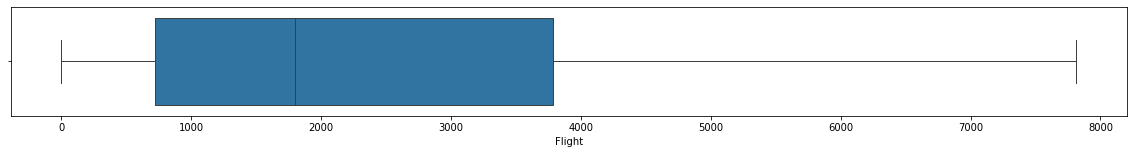

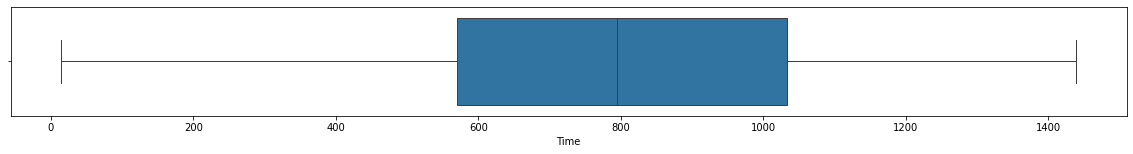

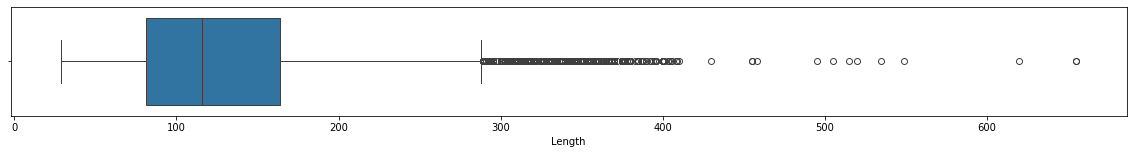

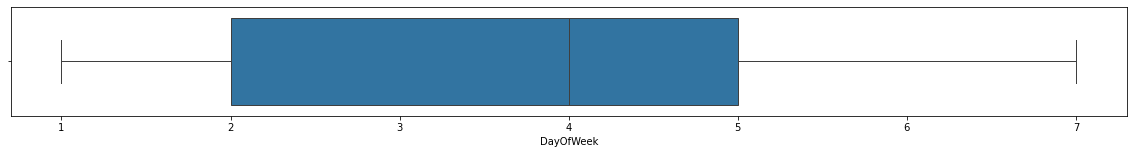

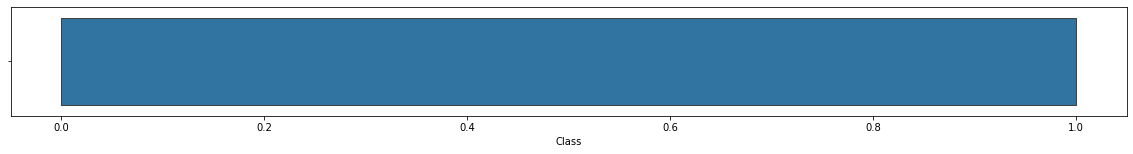

In [22]:
# Mencari Outliers 
# Exclude tipe data object
df_outlier = df.select_dtypes(exclude=['object'])
for column in df_outlier:
        plt.figure(figsize=(20,2))
        sns.boxplot(data=df_outlier, x=column)

In [33]:
df.isna().sum()

Time            873
Length         1343
Airline         582
AirportFrom       0
AirportTo         0
DayOfWeek         0
Class             0
dtype: int64

In [46]:
# Menghitung persentase data yang kosong pada kolom "Length" dan "Time"
# Melakukan imputasi pada data yang kosong dengan menggunakan imputasi rata-rata
# Airline tidak dimasukkan karena termasuk kategorical
null_columns = ['Time','Length']

for i in null_columns :
    mean_value = df[i].mean()
    print("%s : %s" % (i ,  str(mean_value)))
    df[i].fillna(mean_value, inplace = True)

Time : 0.01805657968877171
Length : 0.20998989605180568


In [48]:
# Mengecek kembali apakah masih ada nilai yang nan atau tidak 
df.isna().sum()

Time             0
Length           0
Airline        582
AirportFrom      0
AirportTo        0
DayOfWeek        0
Class            0
dtype: int64

In [50]:
from sklearn.impute import SimpleImputer

In [51]:
# menggunakan fungsi imputasi untuk mengganti nilai pada kolom "Airline"
airportfrom_column = df['Airline'].copy()

modeImputer = SimpleImputer(strategy='most_frequent')

imputed_data = modeImputer.fit_transform(airportfrom_column.values.reshape(-1, 1))

df['Airline'] = imputed_data.flatten()
print(imputed_data)

[['WN']
 ['OO']
 ['DL']
 ...
 ['DL']
 ['US']
 ['DL']]


In [53]:
# Mengimputasi data
np.unique(imputed_data)

array(['9E', 'AA', 'AS', 'B6', 'CO', 'DL', 'EV', 'F9', 'FL', 'HA', 'MQ',
       'OH', 'OO', 'UA', 'US', 'WN', 'XE', 'YV'], dtype=object)

In [54]:
# Mengecek nilai pada kolom "Airline"
df['Airline'].isna().any()

False

---
## Modeling

### Linear Regression
---

In [23]:
# Memanggil library untuk Scaling
from sklearn.preprocessing import RobustScaler

In [25]:
# Menggunakan fungsi Iloc untuk menghilangkan kolom Flight
df = df.iloc[:,1:]
df.head()

In [27]:
scaler = RobustScaler()
df[['Time','Length']] = scaler.fit_transform(df[['Time','Length']])
df.head()

,Time,Length,Airline,AirportFrom,AirportTo,DayOfWeek,Class
0,0.161638,0.771084,NaN,IAH,PHX,5,0
1,-0.926724,-0.602410,OO,DSM,MKE,2,0
2,-0.118534,1.698795,DL,SEA,CVG,7,0
3,-0.431034,1.433735,WN,SNA,MDW,7,1
4,-0.571121,0.204819,CO,IAH,MCO,6,1


In [59]:
# Membuat variabel independen (X) dan variabel dependen (y)
X = df[['Time']]
y = df['Class']

lalu kita buat Data testing dan Data training dengan sekala 70 : 30

In [60]:
# Membagi dataset ke data latih dan data uji

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3, random_state=0)

- Dari printah diatas kita membuat data 70% data pada database digunakan sebagai Data Training
- dan kita buat 30% sisa datanya sebagai Data Test untuk melihat prakira data berikutnya atau forcast

In [61]:
# Memanggil fungsi LinearRegression
from sklearn.linear_model import LinearRegression

In [62]:
# Memanggil objek LinearRegression ke dalam variabel lr
lr = LinearRegression()

# Melatih model
lr.fit(X_train, y_train)

LinearRegression()

In [63]:
# Memprediksi model
y_pred_lr = lr.predict(X_test)
# Nilai prediksi
print("Prediction for test set: {}".format(y_pred_lr))

Prediction for test set: [0.35403114 0.44670824 0.53691394 ... 0.45125022 0.39555048 0.48995755]


In [64]:
# Membandingkan nilai sebenarnya dengan nilai prediksi menggunakan linear regression
lr_diff = pd.DataFrame({'Actual value': y_test, 'Predicted value': y_pred_lr})
lr_diff.head()

,Actual value,Predicted value
7823,1,0.354031
6132,0,0.446708
9949,0,0.536914
10440,0,0.519367
9097,1,0.447944


In [65]:
# Menerapkan threshold pada variabel y_pred_lr ke dalam variabel y_predict_class
y_predict_class = [1 if prob > 0.5 else 0 for prob in y_pred_lr]

In [66]:
# Import Library menghitung akurasi
from sklearn.metrics import accuracy_score

# Menghitung Akurasi
print("Accuracy:"
      , round(accuracy_score(y_test, y_predict_class), 3)) # Membulatkan nilai akurasi menjadi tiga angka di belakang koma

Accuracy: 0.562


- dapat dilihat bahwa pada Linear Regression tingkat accuracy bernilai 0.562 atau 56.2% dari seluruh data

### logistic regression
---

In [67]:
df.head()

,Time,Length,Airline,AirportFrom,AirportTo,DayOfWeek,Class
0,0.161638,0.771084,WN,IAH,PHX,5,0
1,-0.926724,-0.602410,OO,DSM,MKE,2,0
2,-0.118534,1.698795,DL,SEA,CVG,7,0
3,-0.431034,1.433735,WN,SNA,MDW,7,1
4,-0.571121,0.204819,CO,IAH,MCO,6,1


In [68]:
# Scaling
from sklearn.preprocessing import RobustScaler

In [69]:
scaler = RobustScaler()
df[['Time','Length']] = scaler.fit_transform(df[['Time','Length']])
df.head()

,Time,Length,Airline,AirportFrom,AirportTo,DayOfWeek,Class
0,0.157127,0.785714,WN,IAH,PHX,5,0
1,-1.033911,-0.842857,OO,DSM,MKE,2,0
2,-0.149477,1.885714,DL,SEA,CVG,7,0
3,-0.491458,1.571429,WN,SNA,MDW,7,1
4,-0.644760,0.114286,CO,IAH,MCO,6,1


In [70]:
# Menyimpan nama kolom yang berjenis kategori ke dalam variabel cat_col
cat_col = ['Airline','AirportFrom','AirportTo','DayOfWeek']

In [71]:
# Encoding Kolom Kategori
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
df[cat_col] = df[cat_col].apply(le.fit_transform)

In [72]:
df.head()

,Time,Length,Airline,AirportFrom,AirportTo,DayOfWeek,Class
0,0.157127,0.785714,15,125,199,4,0
1,-1.033911,-0.842857,12,76,170,1,0
2,-0.149477,1.885714,5,235,64,6,0
3,-0.491458,1.571429,15,245,162,6,1
4,-0.644760,0.114286,4,125,160,5,1


In [73]:
# Membuat variabel independen (X) dan variabel dependen (y)
# Iloc mebuat group berdasarkan range / jarak
X = df.iloc[:,0:-1].values
y = df.iloc[:,-1].values

In [74]:
# Membagi dataset ke data latih dan data uji
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3, random_state=0)

In [75]:
# Membuat Model - LogisticRegression
from sklearn.linear_model import LogisticRegression

reg = LogisticRegression(solver='lbfgs', max_iter=1000)

In [76]:
reg.fit(X_train, y_train)
y_pred = reg.predict(X_test)

In [77]:
# Import library
from sklearn.metrics import classification_report

# Mendefinisikan nama kelas dalam array
target_names = ['Not Delayed', 'Delayed']

print(classification_report(y_test # Array target yang berisi label aktual
                            , y_pred # Array target yang berisi label prediksi
                            , target_names=target_names)) #Memberikan nama kelas yang akan ditampilkan

              precision    recall  f1-score   support

 Not Delayed       0.59      0.76      0.66      1823
     Delayed       0.51      0.33      0.40      1414

    accuracy                           0.57      3237
   macro avg       0.55      0.54      0.53      3237
weighted avg       0.56      0.57      0.55      3237



- Dapat dilihat untuk logistic regression nilai accuracy adalah 57% dari keseluruhan sample

### K-NN
---

In [78]:
df.head()

,Time,Length,Airline,AirportFrom,AirportTo,DayOfWeek,Class
0,0.157127,0.785714,15,125,199,4,0
1,-1.033911,-0.842857,12,76,170,1,0
2,-0.149477,1.885714,5,235,64,6,0
3,-0.491458,1.571429,15,245,162,6,1
4,-0.644760,0.114286,4,125,160,5,1


In [79]:
# Membuat Model - Import Library
from sklearn.model_selection import cross_val_score, KFold
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report, roc_auc_score

In [80]:
knn = KNeighborsClassifier(n_neighbors= 3) # Menentukan jumlah tetangga terdekat (nearest neighbors)

# Melatih model
knn.fit(X_train, y_train)

# Melakukan validasi silang dengan membagi data pelatihan menjadi 5 lipatan (folds)
k = KFold(n_splits = 5)

# Menghitung skor akurasi untuk setiap lipatan menggunakan metode validasi silang yang telah ditentukan
score = cross_val_score(knn
                        , X_train, y_train
                        , scoring = 'accuracy' #Parameter yang ingin digunakan
                        , cv = k).mean() # cv=k -> jumlah lipatan, .mean() -> menghitung rata-rata skor akurasi

# Mencetak skor akurasi pada set data pelatihan dengan pembulatan ke 3 desimal
print("Accuracy on the training set:", round(score, 3))

Accuracy on the training set: 0.557


In [81]:
# Membuat list kosong dalam variabel accuracy
accuracy = []

# Membuat loop dengan rentang nilai i dari 1-14 (Exclude 15)
# Loop akan menguji setiap n dari 1-14 untuk mencari n dengan akurasi yang paling tinggi

for i in range(1,15):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train,y_train)
    pred_i = knn.predict(X_test)
    accuracy_i = accuracy_score(y_test, pred_i)

    # Menyimpan skor akurasi pada setiap iterasi ke dalam list "accuracy"
    accuracy.append(accuracy_i)

In [82]:
# Import library untuk menampilakan visualisasi data
import matplotlib.pyplot as plt

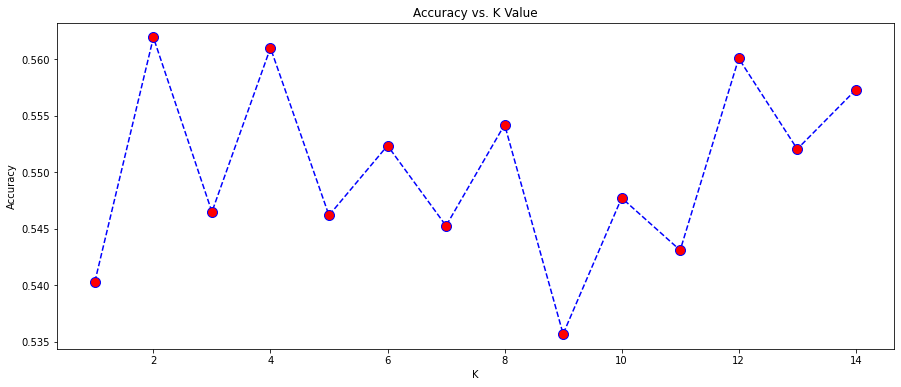

In [83]:
# Melihat akurasi dari setiap iterasi pada line chart
plt.figure(figsize=(15,6))
plt.plot(range(1,15, 1), accuracy, color='blue', linestyle='dashed', marker='o',
         markerfacecolor='red', markersize=10)
plt.title('Accuracy vs. K Value')
plt.xlabel('K')
plt.ylabel('Accuracy')
plt.show()

In [84]:
# Dapat dilihat dari grafik di atas bahwa akurasi paling tinggi didapatkan dengan n = 14
knn = KNeighborsClassifier(n_neighbors = 4)
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)

In [85]:
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy on the test set: {round(accuracy * 100, 2)}%")

Accuracy on the test set: 56.1%


In [86]:
print(classification_report(y_test, y_pred, target_names=target_names))

              precision    recall  f1-score   support

 Not Delayed       0.58      0.77      0.66      1823
     Delayed       0.50      0.30      0.37      1414

    accuracy                           0.56      3237
   macro avg       0.54      0.53      0.52      3237
weighted avg       0.55      0.56      0.54      3237



- dapata dilihat bawha pada model K-NN nilai accuracy data terdapat pada nilai 56.1%

---
## Kesimpulan dari 3 model 

### 1. Linear Regression (56.2%)
### 2. Logistic Regression (57%)
### 3. K-NN (56.1%)

 - Dapat disimpulkan bahwa Logistic Regression memiliki tingkat accuracy yang lebih tinggi dibanding ke-2 lainnya